In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnistist

In [3]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
single_image = x_train[0]

In [7]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

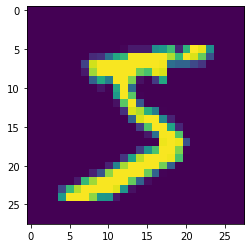

In [8]:
plt.imshow(single_image)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_example = to_categorical(y_train)

In [12]:
y_example.shape

(60000, 10)

In [13]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [15]:
y_cat_train = to_categorical(y_train,10)

In [16]:
single_image.max()

255

In [17]:
single_image.min()

0

In [18]:
x_train = x_train/255

In [19]:
x_test = x_test/255

In [20]:
scaled_image = x_train[0]

In [21]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
scaled_image.max()

1.0

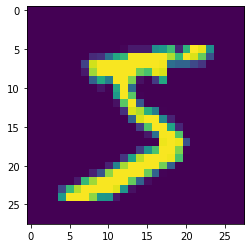

In [23]:
plt.imshow(scaled_image)

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
# batch_size, width, height,color_channels
x_train = x_train.reshape(60000,28,28,1)

In [26]:
x_train.shape

(60000, 28, 28, 1)

In [27]:
x_test.shape

(10000, 28, 28)

In [28]:
x_test = x_test.reshape(10000,28,28,1)

In [29]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [31]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

# output layer
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [37]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0534 - val_accuracy: 0.9880
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0446 - val_accuracy: 0.9889
Epoch 3/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0042 - accuracy: 0.9984 - val_loss: 0.0467 - val_accuracy: 0.9892


In [38]:
metrics = pd.DataFrame(model.history.history)

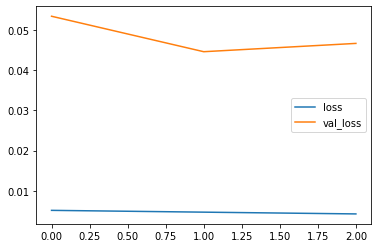

In [39]:
metrics[['loss','val_loss']].plot()

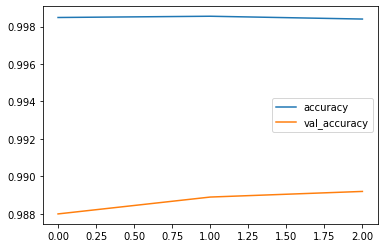

In [40]:
metrics[['accuracy','val_accuracy']].plot()

In [41]:
model.metrics_names

['loss', 'accuracy']

In [42]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.046677425503730774, 0.9891999959945679]

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [45]:
y_cat_test.shape

(10000, 10)

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [47]:
confusion_matrix(y_test,predictions)

array([[ 970,    1,    1,    0,    0,    3,    2,    2,    1,    0],
       [   1, 1129,    1,    1,    0,    1,    0,    1,    0,    1],
       [   0,    1, 1019,    0,    1,    0,    1,    7,    2,    1],
       [   0,    0,    2, 1002,    0,    3,    0,    1,    1,    1],
       [   0,    0,    2,    0,  970,    0,    3,    0,    1,    6],
       [   0,    0,    0,    6,    0,  885,    1,    0,    0,    0],
       [   2,    4,    0,    1,    2,    5,  941,    0,    3,    0],
       [   0,    1,    4,    1,    1,    1,    0, 1017,    1,    2],
       [   2,    1,    3,    3,    0,    1,    0,    0,  963,    1],
       [   0,    1,    0,    1,    4,    2,    0,    2,    3,  996]])

In [48]:
import seaborn as sns

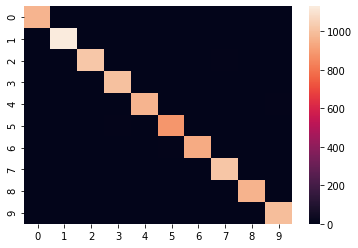

In [49]:
sns.heatmap(confusion_matrix(y_test,predictions))

In [56]:
my_number = x_test[0]

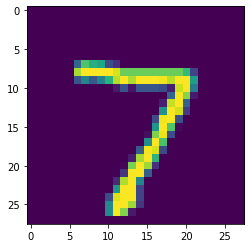

In [57]:
plt.imshow(my_number.reshape(28,28))

In [58]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])

In [ ]:
metrics